In [1]:
# Data split

In [2]:
import pandas as pd

In [3]:
x_train = pd.read_csv("../data/x_train.csv")
x_val = pd.read_csv("../data/x_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_val = pd.read_csv("../data/y_test.csv")

# Training

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

max_depths = [2,4,8,16,32]

# usage examples
# model = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
# model = RandomForestRegressor(random_state=0, max_depth=max_depth, max_features=1/3)
# model = GradientBoostingRegressor(random_state=0, max_depth=max_depth)

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
def train_depth_error(model, max_depths, X_train, y_train, X_val, y_val):
    train_errors = []
    val_errors = []
    for depth in max_depths:
        # train model
        model.set_params(max_depth=depth)
        model.fit(X_train, y_train)
        # compute train error
        y_train_pred = model.predict(X_train)
        train_error = mean_squared_error(y_train, y_train_pred, squared=False)
        train_errors.append(train_error)
        # compute validation error
        y_val_pred = model.predict(X_val)
        val_error = mean_squared_error(y_val, y_val_pred, squared=False)
        val_errors.append(val_error)
    return train_errors, val_errors

In [7]:
from tqdm import tqdm

In [8]:
# to plot the errors
def plot_depth_error(max_depths, tree_train_err, tree_val_err, rf_train_err, rf_val_err, bt_train_err, bt_val_err):
  plt.figure(figsize=(15,15))
  plt.semilogx(max_depths, tree_train_err, 'r.--',label='tree train')
  plt.semilogx(max_depths, tree_val_err, 'r.-', label='tree val')
  plt.semilogx(max_depths, rf_train_err, 'g.--',label='RF train')
  plt.semilogx(max_depths, rf_val_err, 'g.-', label='RF val')
  plt.semilogx(max_depths, bt_train_err, 'b.--',label='BT train')
  plt.semilogx(max_depths, bt_val_err, 'b.-', label='BT val')
  plt.ylabel('RMSE Error')
  plt.xlabel('Max Tree Depth')
  plt.xticks(max_depths, max_depths)
  plt.legend()
  plt.rcParams.update({'font.size': 20})
  plt.show()

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
from tqdm import tqdm

# Define the maximum depths
max_depths = [2, 4, 8, 16, 24, 32]

# prepare parameters for plot depth error:
tree_train_f1_scores = []
tree_val_f1_scores = []
rf_train_f1_scores = []
rf_val_f1_scores = []
bt_train_f1_scores = []
bt_val_f1_scores = []

# Loop over depths with tqdm for a progress bar
for depths in tqdm(max_depths, desc='Processing depths'):
    # 1. Decision tree
    # train
    tree = DecisionTreeClassifier(random_state=0, max_depth=depths)
    tree.fit(x_train, y_train)
    # predict
    tree_y_pred_train = tree.predict(x_train)
    tree_y_pred_val = tree.predict(x_val)
    # calculate F1 score
    tree_train_f1 = f1_score(y_train, tree_y_pred_train)
    tree_val_f1 = f1_score(y_val, tree_y_pred_val)
    # append to vector
    tree_train_f1_scores.append(tree_train_f1)
    tree_val_f1_scores.append(tree_val_f1)

    # 2. Random Forest
    # train
    rf = RandomForestClassifier(random_state=0, max_depth=depths, max_features=1/3)
    rf.fit(x_train, y_train)
    # predict
    rf_y_pred_train = rf.predict(x_train)
    rf_y_pred_val = rf.predict(x_val)
    # calculate F1 score
    rf_train_f1 = f1_score(y_train, rf_y_pred_train)
    rf_val_f1 = f1_score(y_val, rf_y_pred_val)
    # append to vector
    rf_train_f1_scores.append(rf_train_f1)
    rf_val_f1_scores.append(rf_val_f1)

    # 3. Gradient Boosting
    # train
    bt = GradientBoostingClassifier(random_state=0, max_depth=depths)
    bt.fit(x_train, y_train)
    # predict
    bt_y_pred_train = bt.predict(x_train)
    bt_y_pred_val = bt.predict(x_val)
    # calculate F1 score
    bt_train_f1 = f1_score(y_train, bt_y_pred_train)
    bt_val_f1 = f1_score(y_val, bt_y_pred_val)
    # append to vector
    bt_train_f1_scores.append(bt_train_f1)
    bt_val_f1_scores.append(bt_val_f1)

Processing depths:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Processing depths:  17%|█▋        | 1/6 [01:50<09:14, 110.84s/it]c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **

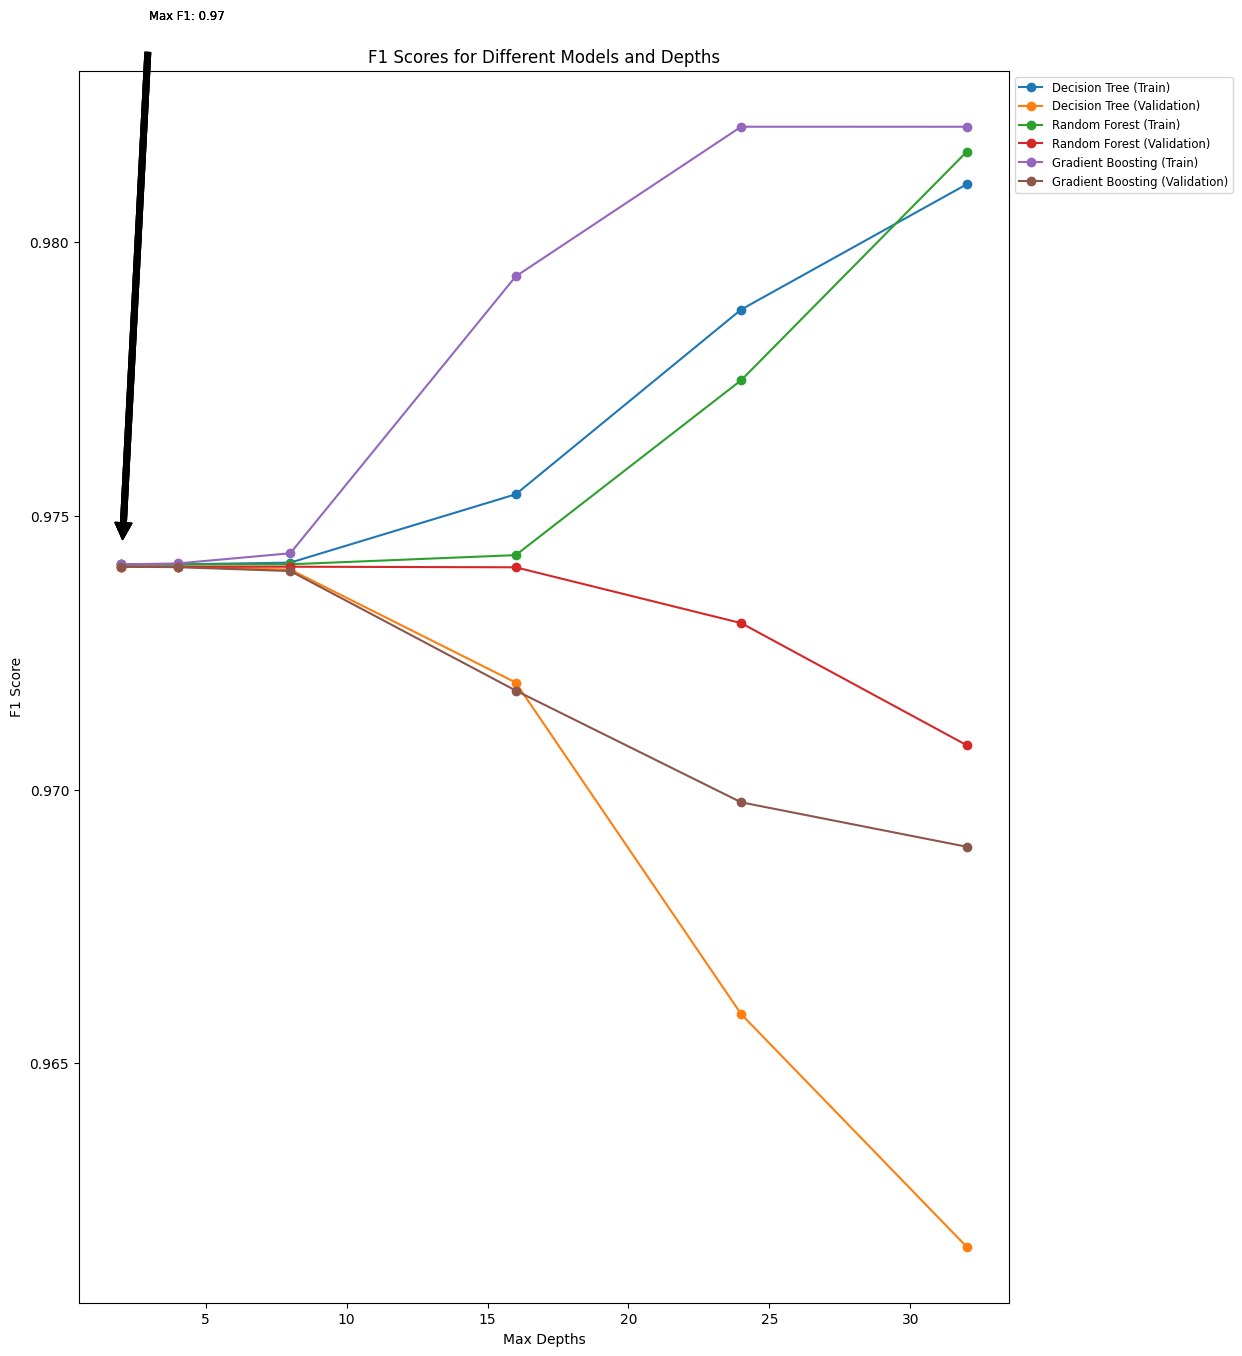

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have collected F1 scores for training and validation sets
# tree_train_f1_scores, tree_val_f1_scores, rf_train_f1_scores, rf_val_f1_scores, bt_train_f1_scores, bt_val_f1_scores

# Create a figure with a larger size and adjusted aspect ratio
plt.figure(figsize=(12, 16))

# Plot F1 scores for Decision Tree
plt.plot(max_depths, tree_train_f1_scores, label='Decision Tree (Train)', marker='o')
plt.plot(max_depths, tree_val_f1_scores, label='Decision Tree (Validation)', marker='o')

# Plot F1 scores for Random Forest
plt.plot(max_depths, rf_train_f1_scores, label='Random Forest (Train)', marker='o')
plt.plot(max_depths, rf_val_f1_scores, label='Random Forest (Validation)', marker='o')

# Plot F1 scores for Gradient Boosting
plt.plot(max_depths, bt_train_f1_scores, label='Gradient Boosting (Train)', marker='o')
plt.plot(max_depths, bt_val_f1_scores, label='Gradient Boosting (Validation)', marker='o')

# Annotate the point with the highest F1 score for Decision Tree
max_f1_tree = max(tree_val_f1_scores)
max_depth_tree = max_depths[tree_val_f1_scores.index(max_f1_tree)]
plt.annotate(f'Max F1: {max_f1_tree:.2f}', xy=(max_depth_tree, max_f1_tree), xytext=(max_depth_tree + 1, max_f1_tree + 0.01),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize='small')

# Annotate the point with the highest F1 score for Random Forest
max_f1_rf = max(rf_val_f1_scores)
max_depth_rf = max_depths[rf_val_f1_scores.index(max_f1_rf)]
plt.annotate(f'Max F1: {max_f1_rf:.2f}', xy=(max_depth_rf, max_f1_rf), xytext=(max_depth_rf + 1, max_f1_rf + 0.01),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize='small')

# Annotate the point with the highest F1 score for Gradient Boosting
max_f1_bt = max(bt_val_f1_scores)
max_depth_bt = max_depths[bt_val_f1_scores.index(max_f1_bt)]
plt.annotate(f'Max F1: {max_f1_bt:.2f}', xy=(max_depth_bt, max_f1_bt), xytext=(max_depth_bt + 1, max_f1_bt + 0.01),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize='small')

# Set plot labels and title
plt.xlabel('Max Depths')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models and Depths')

# Adjust the legend to be outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Show the plot
plt.show()


In [21]:
DTmodel = DecisionTreeClassifier(random_state=0, max_depth=4)

In [22]:
RFmodel = RandomForestClassifier(random_state=0, max_depth=4, max_features=1/3)

In [23]:
GBmodel = GradientBoostingClassifier(random_state=4, max_depth=4)

In [24]:
# Measure train and val RMSE for each and plot them all on the same plot using the provided plot_depth_error function.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score

In [26]:
DTmodel.fit(x_train, y_train)
y_pred_val_dt = DTmodel.predict(x_val)

# Calculate confusion matrix
conf_matrix_val_dt = confusion_matrix(y_val, y_pred_val_dt)

# Calculate F1 score
f1_score_val_dt = f1_score(y_val, y_pred_val_dt)

# Print confusion matrix and F1 score
print("Confusion Matrix (Validation):\n", conf_matrix_val_dt)
print("F1 Score (Validation):", f1_score_val_dt)

Confusion Matrix (Validation):
 [[     0  10166]
 [     1 190965]]
F1 Score (Validation): 0.9740701918147805


In [27]:
RFmodel.fit(x_train, y_train)
y_pred_val_dt = RFmodel.predict(x_val)

# Calculate confusion matrix
conf_matrix_val_dt = confusion_matrix(y_val, y_pred_val_dt)

# Calculate F1 score
f1_score_val_dt = f1_score(y_val, y_pred_val_dt)

# Print confusion matrix and F1 score
print("Confusion Matrix (Validation):\n", conf_matrix_val_dt)
print("F1 Score (Validation):", f1_score_val_dt)

c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion Matrix (Validation):
 [[     0  10166]
 [     0 190966]]
F1 Score (Validation): 0.9740728083285302


In [28]:
GBmodel.fit(x_train, y_train)
y_pred_val_dt = RFmodel.predict(x_val)

# Calculate confusion matrix
conf_matrix_val_dt = confusion_matrix(y_val, y_pred_val_dt)

# Calculate F1 score
f1_score_val_dt = f1_score(y_val, y_pred_val_dt)

# Print confusion matrix and F1 score
print("Confusion Matrix (Validation):\n", conf_matrix_val_dt)
print("F1 Score (Validation):", f1_score_val_dt)

c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (Validation):
 [[     0  10166]
 [     0 190966]]
F1 Score (Validation): 0.9740728083285302


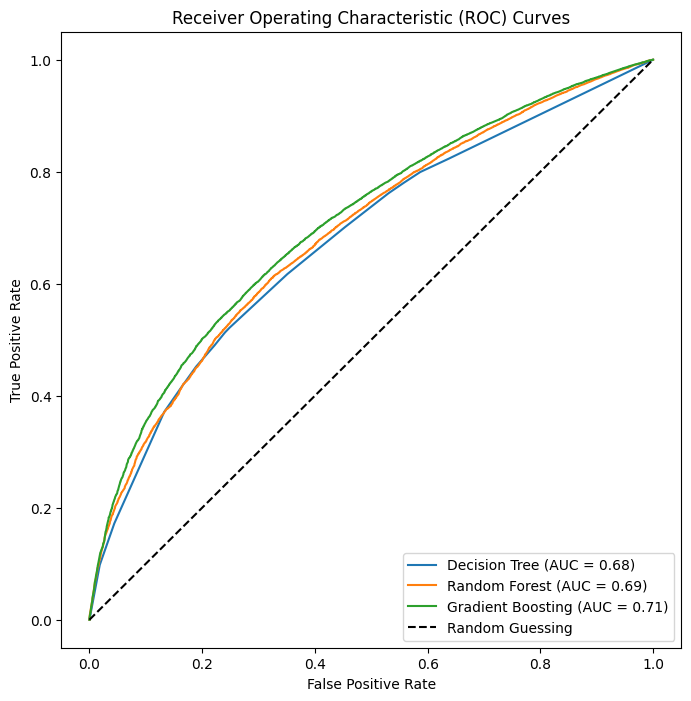

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, x, y, label):
    y_pred_proba = model.predict_proba(x)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves for each model
plt.figure(figsize=(8, 8))

plot_roc_curve(DTmodel, x_val, y_val, 'Decision Tree')
plot_roc_curve(RFmodel, x_val, y_val, 'Random Forest')
plot_roc_curve(GBmodel, x_val, y_val, 'Gradient Boosting')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()